## Project 2 

The goal of this project is to look at a set of video game data ranging from 1985-2016. We'll conduct an exploratory analysis in order to see what interesting questions we can ask about the data set and the video game indsutry as a whole. 

In [1]:
# Different libraries used
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Import the data 

gameData = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
gameData

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


At a glance, we can see that we have a variety of columns that contain both qualitative and quantitative information such as Platform and NA_Sales. 

One thing that we can see right from the get-go is the fact that there is a ton of missing data per column. Deleting NaN values is not the way to handle missing data in any experiment but for simplicitys sake we'll go ahead and do just that in a later portion of this analysis. 

In [3]:
#Checks if col is object/float 

gameData.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

By looking at the each columns "type", we can see that "User_Score" is in fact an object type when it should be in float64 (In other words, it should only contain numeric values). We'll fix that in the next section by converting it into a complete string type.


In [4]:
#Drops rows with 'tbd' in them for User_Score
gameData.drop(gameData[gameData['User_Score'] == "tbd"].index, inplace = True)

Through some of my own experimentation, I found that one of the strings in the column was 'tbd'. I went ahead and removed that although there seem to be other types of string beyond 'tbd' in the column. 

# Data Preparation & Cleaning

The first thing we'll do is remove those pesky NaN values from our data set. This will allow us to work with the data set without bumping into any errors later on. 

In [5]:
#Drop NaN vals from data

gameData = gameData.dropna()


Furthermore, now that we have gotten rid of NaN vals, we can convert the User_Score column into a numeric type.

In [7]:
#Removes warning given from running next line
pd.options.mode.chained_assignment = None  # default='warn'

#converts user_score from str to numeric type
gameData['User_Score'] = pd.to_numeric(gameData['User_Score'])


gameData

    


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


Our new chart only has 6,825 in comparison to the 16,719 we had previously. I don't need to tell you how large of a dip that is in our data set which really comes to show us how messy data is in the real world. 

Now that we have cleaned up our data, we can being our analysis. 


## Analysis (Tables)

In [10]:
gameData.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,0.394484,0.236089,0.064158,0.082677,0.777590,70.272088,28.931136,7.185626,174.722344
std,4.211248,0.967385,0.687330,0.287570,0.269871,1.963443,13.868572,19.224165,1.439942,587.428538
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,6.500000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,7.500000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,8.200000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,9.600000,10665.000000


At the top I have computed a few summary statistics of some of the quantitative columns in the data set. 

At a glance, we can see some interesting things such as the fact that the mean year of release for the games in our list was 2007. Does this mean the person who sampled mainly picked games from that year or did the gaming industry just have a very productive year in 2007? Regardless, it is an interesting observation. 

The average critic score being 70 and the std being around 13.86 are also interesting insights. Are video games mostly considered to be "average" by critics? So many questions! 




In [17]:
#Creates an empty list for quantitative cols
L = []

#for each val in a given col...
for colname, colval in gameData.iteritems():
    
    #if the val in col is not a str type
    if type(colval[2]) != str: 
        
        L.append(colname)

        


We have now created a list of all of the columns with quantitative values in the data set. The reason we want to do this is because we are going to begin working with data that has quantitative values and not qualitiative columns such as Publisher. 

Below this I have created a new variable called 'quantGame' which is composed of only the quantitaitve columns. 

In [18]:
quantGame = gameData[L]

quantGame

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,2006.0,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0
2,2008.0,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0
3,2009.0,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0
6,2006.0,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0
7,2006.0,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0
...,...,...,...,...,...,...,...,...,...,...
16667,2001.0,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0
16677,2002.0,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0
16696,2014.0,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0
16700,2011.0,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0


Now that we have our quantifiable columns seperated, let's create a heat map in order to take a look at what correlations exist and how strong they are. 

Below I have also printed out the r correlation for each set of columns

In [19]:
print(quantGame.corr())

                 Year_of_Release  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Year_of_Release         1.000000 -0.016239  0.041346 -0.038443     0.042315   
NA_Sales               -0.016239  1.000000  0.841808  0.468607     0.726757   
EU_Sales                0.041346  0.841808  1.000000  0.519929     0.716330   
JP_Sales               -0.038443  0.468607  0.519929  1.000000     0.394823   
Other_Sales             0.042315  0.726757  0.716330  0.394823     1.000000   
Global_Sales            0.006661  0.955793  0.939313  0.613546     0.804028   
Critic_Score           -0.007661  0.233580  0.213102  0.147314     0.191509   
Critic_Count            0.203336  0.283917  0.265740  0.168299     0.239513   
User_Score             -0.253914  0.085796  0.055915  0.127521     0.057083   
User_Count              0.199348  0.246208  0.283504  0.072773     0.240085   

                 Global_Sales  Critic_Score  Critic_Count  User_Score  \
Year_of_Release      0.006661     -0.007661      0.203336

<AxesSubplot:>

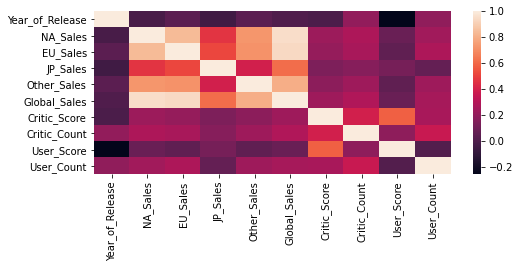

In [20]:
fig, ax = plt.subplots(figsize=(8, 3))

sns.heatmap(quantGame.corr())

Based off of the correlations and heat map, there do not seem to be many interesting correlations that we can pick at. However, there seem to be some correlations between sales in different countries. Let's go ahead and explore that further. 

# Visualizations

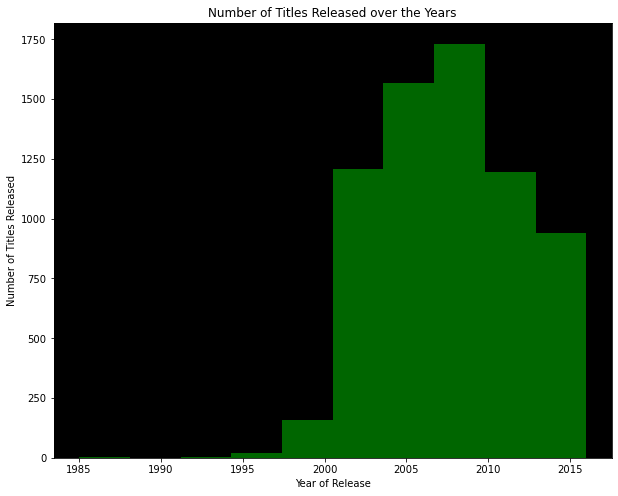

In [21]:
f, ax = plt.subplots(figsize=(10, 8))


ax.hist(quantGame["Year_of_Release"], alpha = 0.8, color = "green")

ax.set(xlabel= "Year of Release", ylabel = "Number of Titles Released")
ax.set_title("Number of Titles Released over the Years")
ax.set_facecolor("black")
  
    
plt.show()



Judging from the histogram above it seems as though many game releases did occur between 2005-2009ish with the peak being around 2007 as shown in one of the tables created earlier. What could have driven this number to be so high? Before we answer this, it may be a smart move to look at other factors first such as sales in different countries over the years. How did games in other countries do? 



In [72]:
NA = quantGame.groupby(["Year_of_Release"]).Global_Sales.sum()

print(NA)


Year_of_Release
1985.0      0.03
1988.0      0.03
1992.0      0.03
1994.0      1.27
1996.0     20.10
1997.0     35.01
1998.0     43.18
1999.0     51.17
2000.0     81.24
2001.0    253.88
2002.0    288.84
2003.0    255.35
2004.0    321.78
2005.0    334.32
2006.0    416.72
2007.0    456.23
2008.0    489.12
2009.0    459.85
2010.0    412.96
2011.0    383.69
2012.0    291.93
2013.0    267.17
2014.0    192.43
2015.0    159.16
2016.0     91.56
Name: Global_Sales, dtype: float64


At a glance we can see that as the year rises so do global sales with the peak being from 2006-2010. Let's illustrate this on a bar graph. 

Text(0, 0.5, 'Global Sales')

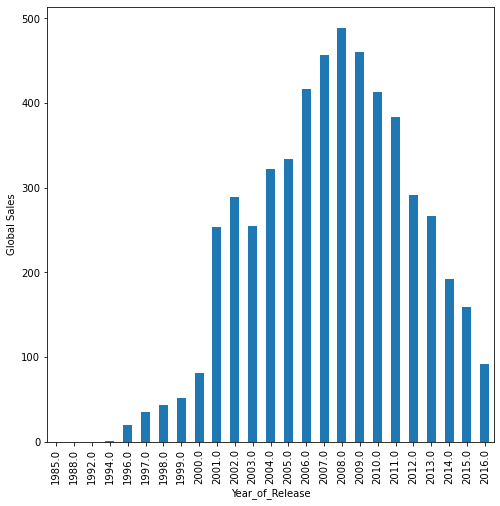

In [53]:

NA.plot(kind = "bar", figsize = (8,8))

plt.ylabel("Global Sales")



Globally, we can see that sales did indeed peak during the 2006-2010 era. I have a few guesses of my own as to why this could be but let's look at different video game genres first in order to see how console sales did. 

Based on my own knowledge of the video game era, the 2006-2010 era saw the release of many popular consoles such as the PS3 and Xbox 360 in 2006-2007 and the Wii in 2008. With the release of these new consoles came a variety of console versions such as the 40GB,60GB, and 80GB versions of the PS3 and of course with new consoles come new games. 

For simplicity sake, I'll be focusing primarily on these three consoles as they were the ones relesed at the peak of the data. 

Text(0, 0.5, 'Global Sales')

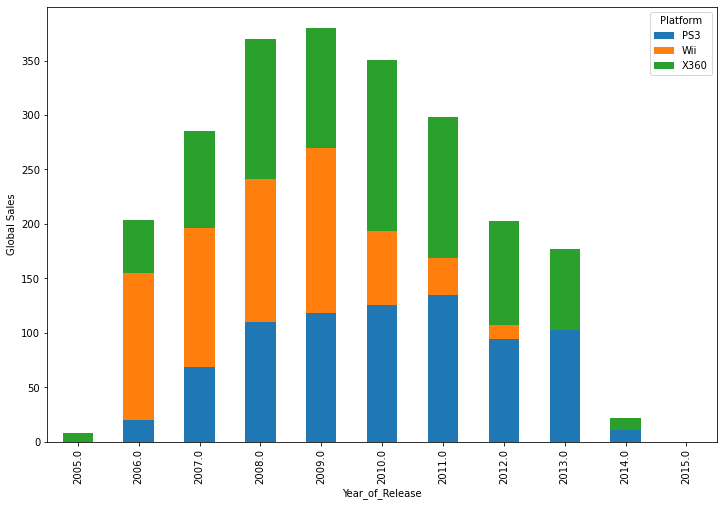

In [75]:
video7th = gameData[(gameData['Platform'] == 'Wii') | (gameData['Platform'] == 'PS3') | 
                    (gameData['Platform'] == 'X360')]

console = video7th.groupby(["Year_of_Release", "Platform"]).Global_Sales.sum()

console.unstack().plot(kind = "bar", stacked = True, figsize = (12,8))

plt.ylabel("Global Sales")


According to the graph above, the Wii was the better selling console during the 2006-2009 era while the Xbox 360 remained dominant duyring the 2010-2012 era. It is not surprising that these consoles sold less post 2011 as that was around the time that new consoles came out and with new consoles usually comes a halt of production on previous generation of consoles. 

Other potential reasons for the 360 selling as well as it did could be becuase during this era, COD and XBOX had a partership where XBOX would get new content an entire month earlier than PS3 and because COD was so popular during this era, it likely drove consimers toward the console. Furthermore, 2011 saw the PS3 undergo a massive breach of security which likely pushed consumers toward the 360. 

Text(0, 0.5, 'Global Sales')

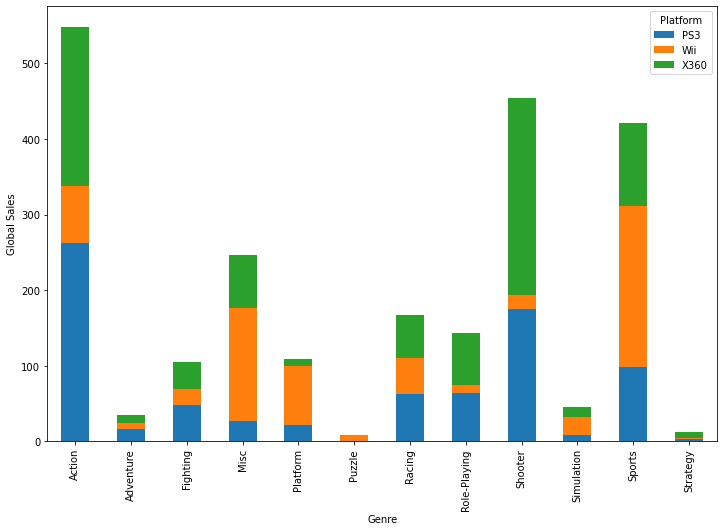

In [84]:
gameData["Genre"].unique()



console = video7th.groupby(["Genre", "Platform"]).Global_Sales.sum()

console.unstack().plot(kind = "bar", stacked = True, figsize = (12,8))

plt.ylabel("Global Sales")




Indeed it seems as though the Xbox 360's most popular Genre was shooters. Surpsingly, the Wii actually saw most of its sales come from the sport platform. As a gamer this takes me by suprise because to me the Xbox and Playstationa re wehre I would find most people playing sports games but this seems to contradict that. 

Action genre is another genre that seems to be popular amongst the PS3 crowd which is not too suprising as Sony tends to release a lot of action/adventure exclusives on their console (Ex. Infamous, Uncharted)